In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats




In [5]:
#Load in data 
df_agg = pd.read_csv("C:\\Windows\\system32\\Cowbird\\Plots\\aggregated_data.csv")

#WSL means left wing - WSR means right wing

In [6]:
def get_song_stats(df_agg, want_aggregated=True):
    rows = []  # instead of df.append()

    if want_aggregated:
        df_song_type = df_agg

        rows.append({
            'Song_type': 'Aggregated',

            # WS onsets and offsets are relative to song onset
            'Mean_On_WSL': np.mean(df_song_type['Onset_Relative_WSL']),
            'Mean_Off_WSL': np.mean(df_song_type['Offset_Relative_WSL']),
            'Mean_Duration_WSL': np.mean(df_song_type['Duration_WSL']),
            'Std_On_WSL': np.std(df_song_type['Onset_Relative_WSL']),
            'Std_Off_WSL': np.std(df_song_type['Offset_Relative_WSL']),
            'Std_Duration_WSL': np.std(df_song_type['Duration_WSL']),
            'Var_On_WSL': np.var(df_song_type['Onset_Relative_WSL']),
            'Var_Off_WSL': np.var(df_song_type['Offset_Relative_WSL']),
            'Var_Duration_WSL': np.var(df_song_type['Duration_WSL']),

            'Mean_On_WSR': np.mean(df_song_type['Onset_Relative_WSR']),
            'Mean_Off_WSR': np.mean(df_song_type['Offset_Relative_WSR']),
            'Mean_Duration_WSR': np.mean(df_song_type['Duration_WSR']),
            'Std_On_WSR': np.std(df_song_type['Onset_Relative_WSR']),
            'Std_Off_WSR': np.std(df_song_type['Offset_Relative_WSR']),
            'Std_Duration_WSR': np.std(df_song_type['Duration_WSR']),
            'Var_On_WSR': np.var(df_song_type['Onset_Relative_WSR']),
            'Var_Off_WSR': np.var(df_song_type['Offset_Relative_WSR']),
            'Var_Duration_WSR': np.var(df_song_type['Duration_WSR']),

            'Mean_Duration_Acoustic': np.mean(df_song_type['Duration_acoustic']),
            'Std_Duration_Acoustic': np.std(df_song_type['Duration_acoustic']),
            'Var_Duration_Acoustic': np.var(df_song_type['Duration_acoustic'])
        })

        return pd.DataFrame(rows)


    # ---------------- Non-aggregated: your original loop ----------------
    for song in song_types:
        song_type = str(song)
        df_song_type = df_agg[df_agg['Song_type'] == song_type]

        rows.append({
            'Song_type': song_type,

            # WS onsets and offsets are relative to song onset
            'Mean_On_WSL': np.mean(df_song_type['Onset_Relative_WSL']),
            'Mean_Off_WSL': np.mean(df_song_type['Offset_Relative_WSL']),
            'Mean_Duration_WSL': np.mean(df_song_type['Duration_WSL']),
            'Std_On_WSL': np.std(df_song_type['Onset_Relative_WSL']),
            'Std_Off_WSL': np.std(df_song_type['Offset_Relative_WSL']),
            'Std_Duration_WSL': np.std(df_song_type['Duration_WSL']),
            'Var_On_WSL': np.var(df_song_type['Onset_Relative_WSL']),
            'Var_Off_WSL': np.var(df_song_type['Offset_Relative_WSL']),
            'Var_Duration_WSL': np.var(df_song_type['Duration_WSL']),

            'Mean_On_WSR': np.mean(df_song_type['Onset_Relative_WSR']),
            'Mean_Off_WSR': np.mean(df_song_type['Offset_Relative_WSR']),
            'Mean_Duration_WSR': np.mean(df_song_type['Duration_WSR']),
            'Std_On_WSR': np.std(df_song_type['Onset_Relative_WSR']),
            'Std_Off_WSR': np.std(df_song_type['Offset_Relative_WSR']),
            'Std_Duration_WSR': np.std(df_song_type['Duration_WSR']),
            'Var_On_WSR': np.var(df_song_type['Onset_Relative_WSR']),
            'Var_Off_WSR': np.var(df_song_type['Offset_Relative_WSR']),
            'Var_Duration_WSR': np.var(df_song_type['Duration_WSR']),

            'Mean_Duration_Acoustic': np.mean(df_song_type['Duration_acoustic']),
            'Std_Duration_Acoustic': np.std(df_song_type['Duration_acoustic']),
            'Var_Duration_Acoustic': np.var(df_song_type['Duration_acoustic'])
            })
    return pd.DataFrame(rows)

-----------------------------------------------------------Song Type - Aggregated ----------------------------------------------------------


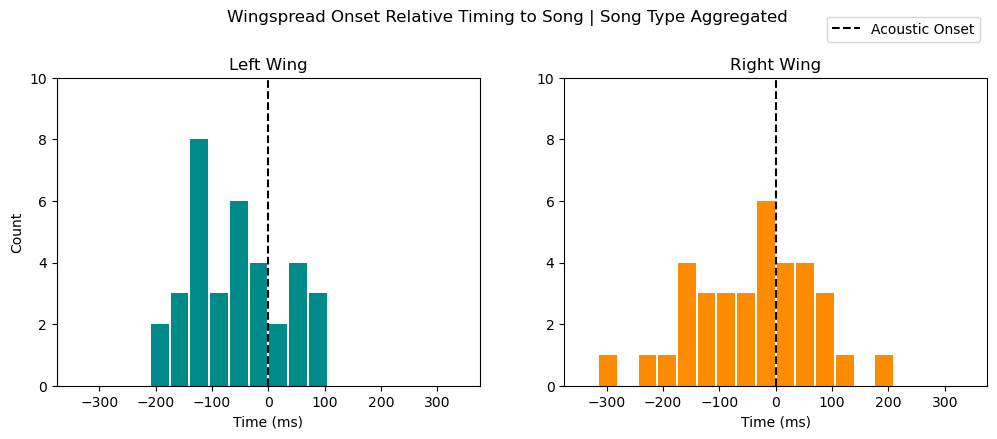

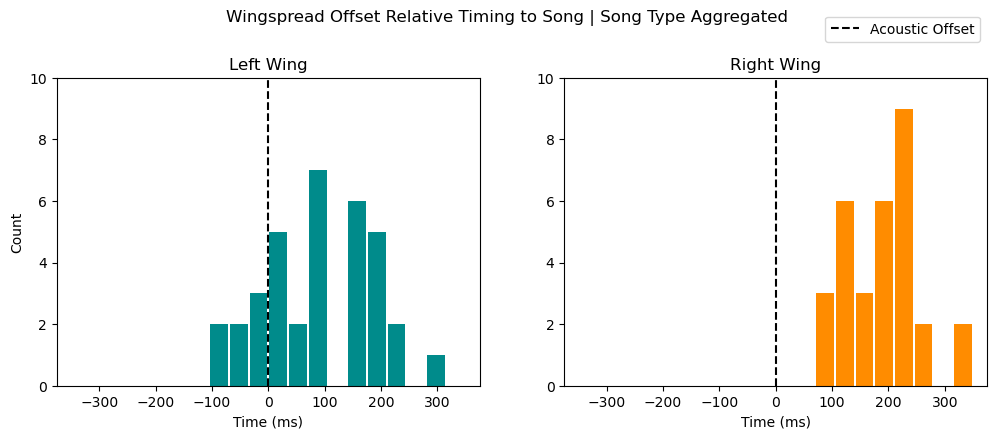

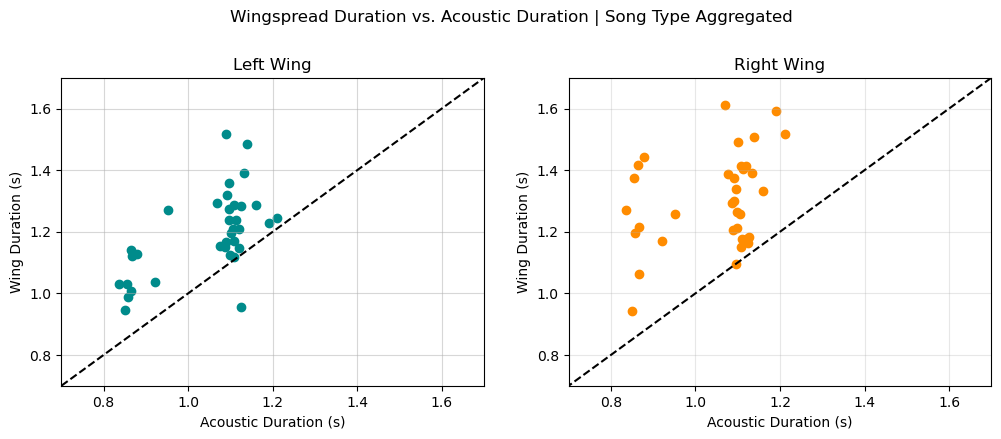

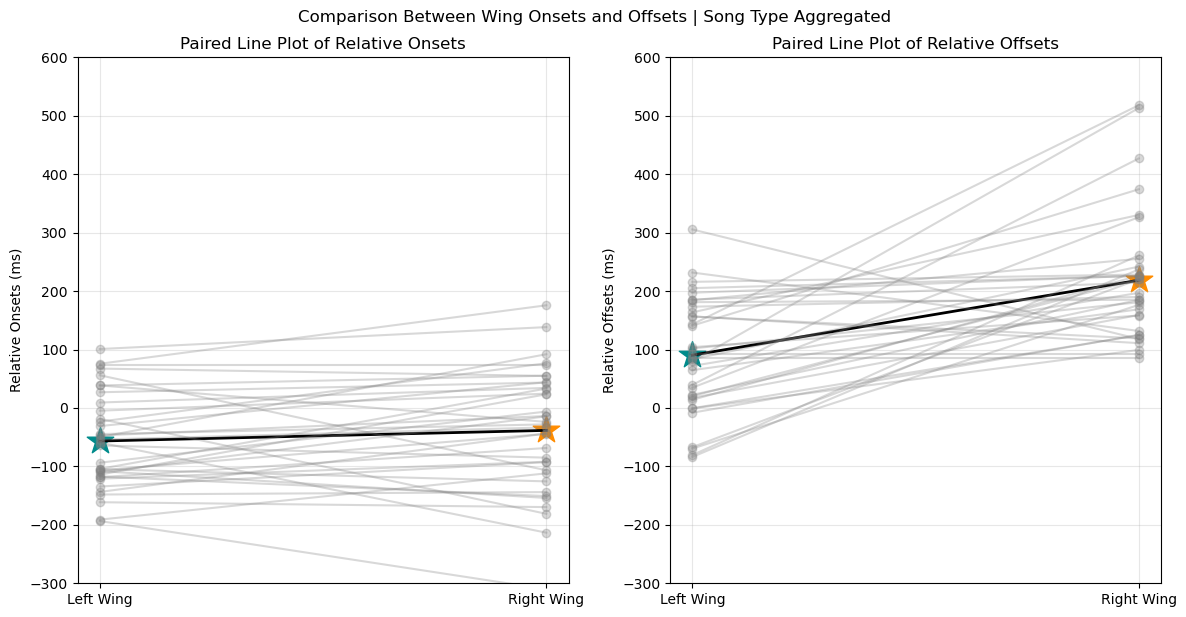

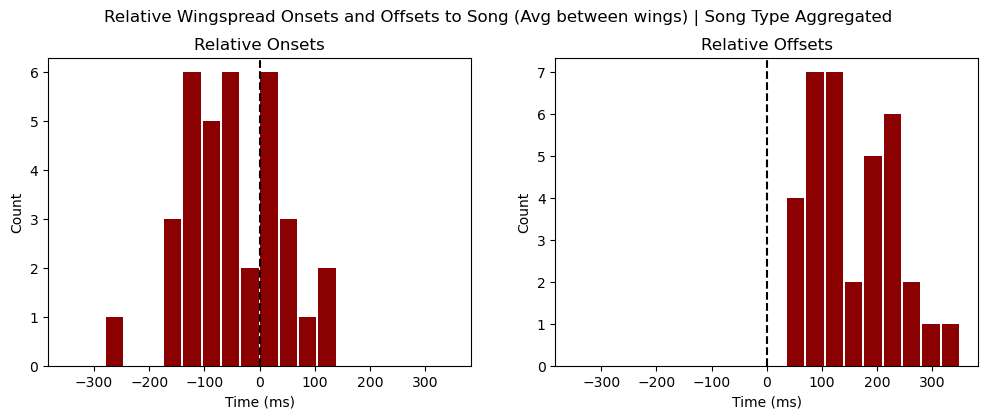

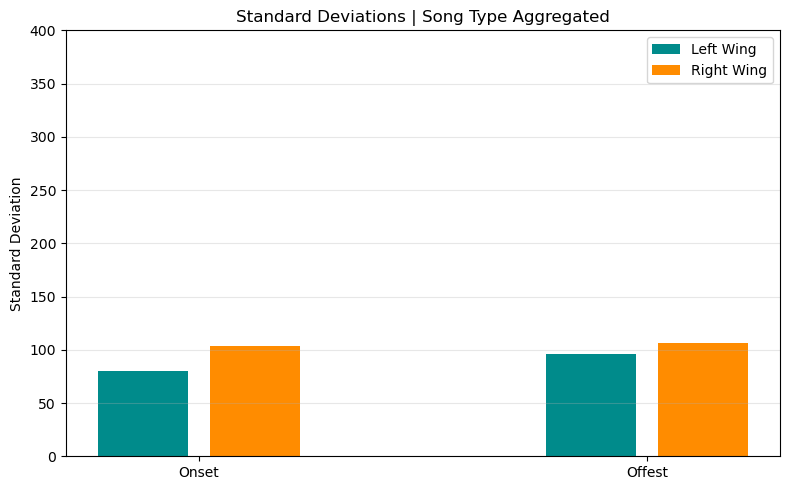

In [9]:
#Relative timing plots per song type - 11/20 - #Make into function

aggregate = True


df_song_stats = get_song_stats(df_agg, want_aggregated = aggregate)
    
   
song_type = row['Song_type']
if aggregate:
    df_song_type = df_agg


print(f'-----------------------------------------------------------Song Type - {song_type} ----------------------------------------------------------')
bins   = np.linspace(-350, 350, 21)  

# --- Relative Onsets ---
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].hist(df_song_type['Onset_Relative_WSL'], color = 'darkcyan', bins = bins, rwidth = 0.9) #Left Wing
ax[0].axvline(x = 0, color = 'k', linestyle = '--', label = 'Acoustic Onset')

ax[0].set_xlim(-375,375)
ax[0].set_ylim(0,10)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Time (ms)')
ax[0].set_title('Left Wing')


ax[1].hist(df_song_type['Onset_Relative_WSR'], color = 'darkorange', bins = bins, rwidth = 0.9) #Right Wing
ax[1].axvline(x = 0, color = 'k', linestyle = '--', label = 'Acoustic Onset')

ax[1].set_xlim(-375,375)
ax[1].set_ylim(0,10)
ax[1].set_xlabel('Time (ms)')
ax[1].set_title('Right Wing')

plt.suptitle(f'Wingspread Onset Relative Timing to Song | Song Type {song_type}', y = 1.05)

labels = ['Acoustic Onset']
fig.legend(labels, loc='upper right', bbox_to_anchor=(0.9, 1.05), ncol=1)

plt.show()
plt.close()

# --- Relative Offsets ---
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].hist(df_song_type['Offset_Relative_WSL'],color = 'darkcyan', bins = bins, rwidth = 0.9) #Left wing
ax[0].axvline(x = 0, color = 'k', linestyle = '--', label = 'Acoustic Offset')

ax[0].set_xlim(-375,375)
ax[0].set_ylim(0,10)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Time (ms)')
ax[0].set_title('Left Wing')


ax[1].hist(df_song_type['Offset_Relative_WSR'], color = 'darkorange', bins = bins, rwidth = 0.9) #Right Wing
ax[1].axvline(x = 0, color = 'k', linestyle = '--', label = 'Acoustic Offset')

ax[1].set_xlim(-375,375)
ax[1].set_ylim(0,10)
ax[1].set_xlabel('Time (ms)')
ax[1].set_title('Right Wing')

labels = ['Acoustic Offset']
fig.legend(labels, loc='upper right', bbox_to_anchor=(0.9, 1.05), ncol=1)
plt.suptitle(f'Wingspread Offset Relative Timing to Song | Song Type {song_type}', y = 1.05)

plt.show()
plt.close()

# --- Durations ---
fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].scatter(df_song_type['Duration_acoustic'],df_song_type['Duration_WSL'], color = 'darkcyan')

#Create y = x line
x = np.linspace(-1000,1000,100)
y = x

ax[0].plot(x,y, color = 'k', linestyle = '--')

ax[0].set_xlim(0.7, 1.7)
ax[0].set_ylim(0.7, 1.7)
ax[0].set_ylabel('Wing Duration (s)')
ax[0].set_xlabel('Acoustic Duration (s)')
ax[0].set_title('Left Wing')
ax[0].grid(alpha = 0.5)



ax[1].scatter(df_song_type['Duration_acoustic'],df_song_type['Duration_WSR'], color = 'darkorange')

ax[1].plot(x,y, color = 'k', linestyle = '--')

ax[1].set_xlim(0.7, 1.7)
ax[1].set_ylim(0.7, 1.7)
ax[1].set_ylabel('Wing Duration (s)')
ax[1].set_xlabel('Acoustic Duration (s)')
ax[1].set_title('Right Wing')
ax[1].grid(alpha = 0.3)

plt.suptitle(f'Wingspread Duration vs. Acoustic Duration | Song Type {song_type}', y = 1.05)
plt.show()
plt.close()

#---------------------------------------------------------------------------------------------------------------------------------
#Compare Wings
fig, ax = plt.subplots(1,2, figsize = (12,6))
Left = df_song_type['Onset_Relative_WSL'].to_numpy()
Right = df_song_type['Onset_Relative_WSR'].to_numpy()

mean_left = np.mean(Left)
mean_right = np.mean(Right)

recordings = np.arange(len(Left))  # or use your subject IDs


ax[0].scatter(0, mean_left, color = 'darkcyan',marker = '*', s = 400, alpha = 1)
ax[0].scatter(1, mean_right, color = 'darkorange',marker = '*', s = 400, alpha = 1)
ax[0].plot([0,1],[mean_left,mean_right], color = 'k', linewidth = 2)


for i in range(len(recordings)):
    ax[0].plot([0, 1], [Left[i],Right[i]], marker='o', color = 'grey', alpha = 0.3)

ax[0].set_xticks([0, 1], ['Left Wing', 'Right Wing'])
ax[0].set_ylabel('Relative Onsets (ms)')
ax[0].set_title(f"Paired Line Plot of Relative Onsets")

ax[0].grid(alpha=0.3)
ax[0].set_ylim(-300,600)


# --- Offsets ---
Left = df_song_type['Offset_Relative_WSL'].to_numpy()
Right = df_song_type['Offset_Relative_WSR'].to_numpy()

mean_left = np.mean(Left)
mean_right = np.mean(Right)

recordings = np.arange(len(Left))  # or use your subject IDs


ax[1].scatter(0, mean_left, color = 'darkcyan',marker = '*', s = 400, alpha = 1)
ax[1].scatter(1, mean_right, color = 'darkorange',marker = '*', s = 400, alpha = 1)
ax[1].plot([0,1],[mean_left,mean_right], color = 'k', linewidth = 2)


for i in range(len(recordings)):
    ax[1].plot([0, 1], [Left[i],Right[i]], marker='o', color = 'grey', alpha = 0.3)

ax[1].set_xticks([0, 1], ['Left Wing', 'Right Wing'])
ax[1].set_ylabel('Relative Offsets (ms)')
ax[1].set_title("Paired Line Plot of Relative Offsets")
ax[1].set_ylim(-300,600)

ax[1].grid(alpha=0.3)
fig.tight_layout()
fig.suptitle(f'Comparison Between Wing Onsets and Offsets | Song Type {song_type}', y = 1.02)


plt.show()
plt.close()


# ---Onset averages between both wings then compare to song ---
R_Onset = df_song_type['Onset_WSR']
L_Onset = df_song_type['Onset_WSL']
Avg_Onset = np.mean((L_Onset, R_Onset), axis = 0)
Relative_avg_onset = (Avg_Onset - df_song_type['Onset_acoustic']) *1000

R_Offset = df_song_type['Offset_WSR']
L_Offset = df_song_type['Offset_WSL']
Avg_Offset = np.mean((L_Offset, R_Offset), axis = 0)
Relative_avg_offset = (Avg_Offset - df_song_type['Offset_acoustic']) *1000


fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].hist(Relative_avg_onset, color = 'darkred', bins = bins, rwidth = 0.9) #Right Wing
ax[0].axvline(x = 0, color = 'k', linestyle = '--', label = 'Acoustic Onset')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Count')
ax[0].set_title('Relative Onsets')


ax[1].hist(Relative_avg_offset, color = 'darkred', bins = bins, rwidth = 0.9) #Right Wing
ax[1].axvline(x = 0, color = 'k', linestyle = '--', label = 'Acoustic Offset')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Count')
ax[1].set_title('Relative Offsets')

plt.suptitle(f'Relative Wingspread Onsets and Offsets to Song (Avg between wings) | Song Type {song_type}', y = 1)
plt.show()
plt.close()


df_temp = df_song_stats[df_song_stats['Song_type'] == song_type]

# ---- Ploting Variances ---- 
categories = ['Onset', 'Offest']
Left_wing_values = [df_temp['Std_On_WSL'].to_numpy()[0], df_temp['Std_Off_WSL'].to_numpy()[0]]
Right_wing_values = [df_temp['Std_On_WSR'].to_numpy()[0], df_temp['Std_Off_WSR'].to_numpy()[0]]

# Bar positions
x = np.arange(len(categories))
width = 0.25
fig, ax = plt.subplots(figsize=(8, 5))

# Plot both wings on the same axes
ax.bar(x - width/2, Left_wing_values, width = 0.2, label='Left Wing', color='darkcyan')
ax.bar(x + width/2, Right_wing_values, width = 0.2, label='Right Wing', color='darkorange')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Standard Deviation')
ax.set_ylim(0, 400)
ax.grid(alpha=0.3, axis='y')
ax.set_title(f'Standard Deviations | Song Type {song_type}')
ax.legend()

plt.tight_layout()
plt.show()
plt.close()
#aggregate = False

In [10]:
#Comparison between wings - t_test

onset_WSR = df_agg['Onset_Relative_WSR']
onset_WSL = df_agg['Onset_Relative_WSL']

offset_WSR = df_agg['Offset_Relative_WSR']
offset_WSL = df_agg['Offset_Relative_WSL']

t_stat_onset, p_value_onset = stats.ttest_ind(onset_WSL, onset_WSR, equal_var = False)
print(f'Onset t-test | The t-stat is {t_stat_onset} and the p-value is {p_value_onset}')

t_stat_offset, p_value_offset = stats.ttest_ind(offset_WSL, offset_WSR, equal_var = False)
print(f'Offset t-test | The t-stat is {t_stat_offset} and the p-value is {p_value_offset}')



Onset t-test | The t-stat is -0.8115447498911978 and the p-value is 0.4200747587296261
Offset t-test | The t-stat is -5.228495932297722 and the p-value is 1.8172219701355194e-06


In [11]:
print(df_song_stats)

    Song_type  Mean_On_WSL  Mean_Off_WSL  Mean_Duration_WSL  Std_On_WSL  \
0  Aggregated   -56.582786     90.329336           1.192619   79.626782   

   Std_Off_WSL  Std_Duration_WSL  Var_On_WSL  Var_Off_WSL  Var_Duration_WSL  \
0     96.06948          0.134242  6340.42434  9229.344931          0.018021   

   ...  Mean_Duration_WSR  Std_On_WSR  Std_Off_WSR  Std_Duration_WSR  \
0  ...           1.302738  103.857864   106.085636          0.149197   

     Var_On_WSR   Var_Off_WSR  Var_Duration_WSR  Mean_Duration_Acoustic  \
0  10786.455922  11254.162212           0.02226                1.045707   

   Std_Duration_Acoustic  Var_Duration_Acoustic  
0               0.113074               0.012786  

[1 rows x 22 columns]
